In [2]:
#SCRIPT TO TEST AND DEBUG SPEEDS
from tools import *
import IPython
mpt = mpt_data(data = ['DE_40_2_60.mpt'])
masked_mpt = mpt_data(data = ['copy.mpt'], mask = mpt.fast_mask())

running on  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
CHI-SQ ERROR:  1165.5913033566428
CHI-SQ ERROR:  1165.5860942954332
CHI-SQ ERROR:  608.7914274789191
CHI-SQ ERROR:  608.7917285982951
CHI-SQ ERROR:  7252903539.208497
CHI-SQ ERROR:  608.7918267344555
CHI-SQ ERROR:  9776347.468528531
CHI-SQ ERROR:  2389.686464744516
CHI-SQ ERROR:  14632830430.222967
CHI-SQ ERROR:  1165.5860498787974
No handles with labels found to put in legend.
CHI-SQ ERROR:  608.7914274789191
time to calculate:  13.753449201583862  seconds


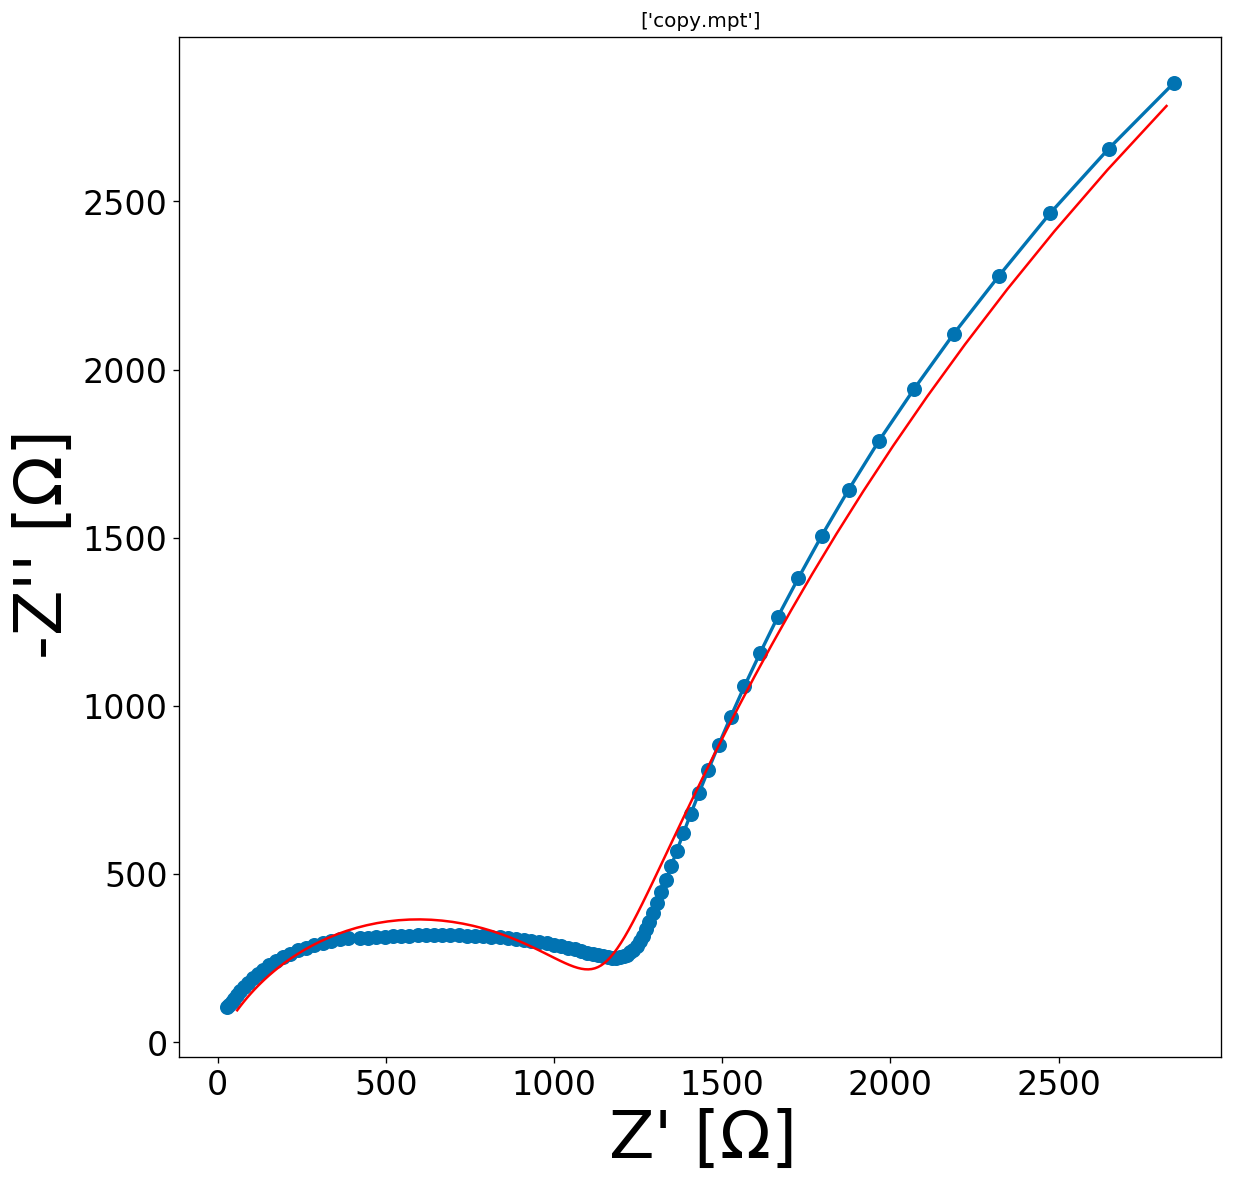

,file,fit_Rs,fit_R1,fit_n1,fit_Q1,fit_R2,fit_n2,fit_Q2
0,copy.mpt,0.026666,1146.620105,0.70578,1.374594e-07,14209.999984,0.793082,0.000005


In [6]:
masked_mpt.guesser(circuit = 'R-RQ-RQ', no_of_fits= 10)